<a href="https://colab.research.google.com/github/MinsooKwak/RAG/blob/main/test/search/RAG_%EA%B2%80%EC%83%89_%EB%B0%8F_%EB%B2%A1%ED%84%B0%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**검색을 위한 방법**

- 키워드 검색 : 사용자가 입력한 하나 또는 여러 키워드 바탕으로 정보 찾아내는 과정
  - 키워드 들어간 문서 반환
  - 한계 : 사용자의 의도를 파악하지 못함

- Semantic 검색 : 사용자의 질문이나 검색어의 의미를 이해하려고 시도하는 검색 기술
  - 사용자의 의도를 파악하고 의미 이해에 중점
  - 사용자의 의도를 이해하고, 관련 결과 제공
  - 한계 :
    - 사용자 의도를 이해하기 위해 관련 정보가 많이 들어가야 함
  
      `ex. 사용자 위치, 최근 검색 이력, 현재 인기있는 영화 등`
    - 구현과 최적화의 복잡성

  - 사용 사례 : 웹 검색 엔진, 전자 상거래 플랫폼, 기업 내부 데이터 검색
  - 작동 원리 : 의미 + 문맥
  - NLP 중심
  - 적용 분야 : 웹 검색 엔진, QA

- 벡터 검색(vector search) : 고차원 벡터 공간에서 유사도 기반으로 정보 검색하는 기술
  - 벡터로 변환 > 벡터간 유사도 측정 > 유사항목 검색(파이스, 엘라스틱 서치 등)
  - 종류 : **유사도 검색(Similarity Search)**, **MMR(Maximum Marginal Relevance)**
    - MMR : 검색 결과 다양성을 강화하는 중요한 방법
      - 벡터 저장소에 쿼리해 가장 유사한 "fetch_k" 응답을 선택 > 이후 가장 다양한 "k" 응답 선택
      - semantic 검색이 다양성이 떨어지는 한계 있기 때문
      - 기존에 누락되었을 수 있음
  - 작동 원리 : 쿼리와 데이터를 베거로 변환 후 유사도 계산
  - 텍스트, 이미지, 비디오 등 가능
  - 의미적 유사성 기반 검색 방식
  - 추천시스템, 이미지/비디오 검색, 유사항목 검색
  - 한계 :
    - 데이터를 벡터로 변환하는 전처리 필요
    - 베거 계산에 대한 계산 비용 발생

- 하이브리드 검색 : 키워드 검색 + 시맨틱 검색 + 벡터 검색
  - RAG에서 많이 선호

**벡터 데이터베이스** :
- 고차원 **벡터 데이터를 저장**하고, 이를 기반으로 **유사성 검색**을 수행할 수 있는 DB
- 특징
  - 고차원 벡터 저장
  - 유사도 검색
  - 인덱싱 기반

- 벡터 DB 주요 속성
  - 벡터 저장 및 검색 지원
  - 능숙한 유사도 검색
  - 임베딩 지원
  - 실시간 처리
  - 확장성 (계산 부하 분산할 수 있는 수평적 확장을 지원)

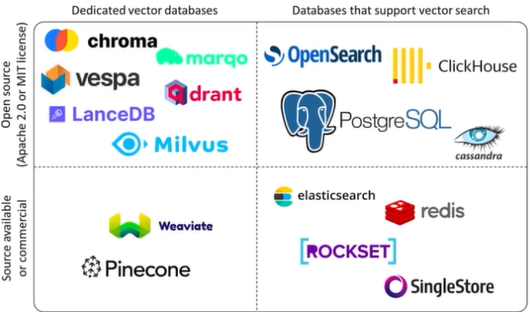

- **파인콘 (상용)**
  - 머신 러닝 모델에서 생성된 벡터 데이터를 저장하고, 이런 벡터들 사이에 유사성 검색 수행할 수 있는 인프라 제공
  - 플랫폼 : 클라우드 기반
  - 특징 : 실시간 검색, 확장성
  - 사용 사례 : 추천 시스템, 유사도 검색
  - 장점 : 빠른 검색 및 쉬운 관리
  - 단점 : 비용

- **파이스(오픈소스)**
  - Facebook AI Similarity Search (Facebook 개발)
  - 대규모 벡터 집합에서 효율적 유사성 검색 수행
  - 플랫폼 : On-Prem, 클라우드
  - 개발 언어 : C++ (파이썬 바인딩 제공)
  - 특징 : 고성능, CPU/GPU 지원, 다양 인덱싱 옵션
  - 사용 사례 : 유사도 검색, 대규모 데이터 처리
  - 장점 : 오픈소스(무료)
  - 단점 : 사용의 복잡성
    - 대규모 데이터셋에서 고성능 검색 기능 구현 위해 **인덱싱 구조 이해** 필요
  
- **크로마(오픈소스)**
  - LLM 애플리케이션 개발 간소화하도록 설계
  - 쿼리, 필터링, 밀도 추정, 랭체인, 라마인덱스 지원 (공통)

- **위비에이터(상용)**
  - 내장된 ML 모델 통한 텍스트 자동적 벡터 자동화
  - 임베딩 모델 넣어야?
  - On-prem, 클라우드
  - 개발 언어 : Go, 파이썬 SDK 제공
  - 특징 : 벡터 자동화, 확장성
  - 사용 사례 : 유사도 검색, 데이터 분석, 자동 벡터화

In [ ]:
#!pip install langchain
#!pip install -U langchain-community

In [30]:
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain # q&a interface 역할 (단점 : 속도)
from langchain.llms import OpenAI
from langchain.callbacks import get_openai_callback
from IPython.display import JSON

In [10]:
# API키
import os
from config import OPEN_AI_API_KEY
os.environ["OPENAI_API_KEY"] = OPEN_AI_API_KEY

데이터 import

In [ ]:
#!pip install pypdf

In [13]:
# PDF 가져올 때
from langchain.document_loaders import PyPDFLoader

# PDF 가져오기
loaders = [
    PyPDFLoader("2306.05685v4.pdf")
]

docs = []
for loader in loaders:
  docs.extend(loader.load())

In [15]:
len(docs)

29

In [16]:
docs[0]

Document(metadata={'source': '2306.05685v4.pdf', 'page': 0}, page_content='Judging LLM-as-a-Judge\nwith MT-Bench and Chatbot Arena\nLianmin Zheng1∗Wei-Lin Chiang1∗Ying Sheng4∗Siyuan Zhuang1\nZhanghao Wu1Yonghao Zhuang3Zi Lin2Zhuohan Li1Dacheng Li13\nEric P. Xing35Hao Zhang12Joseph E. Gonzalez1Ion Stoica1\n1UC Berkeley2UC San Diego3Carnegie Mellon University4Stanford5MBZUAI\nAbstract\nEvaluating large language model (LLM) based chat assistants is challenging due to\ntheir broad capabilities and the inadequacy of existing benchmarks in measuring\nhuman preferences. To address this, we explore using strong LLMs as judges to\nevaluate these models on more open-ended questions. We examine the usage and\nlimitations of LLM-as-a-judge, including position, verbosity, and self-enhancement\nbiases, as well as limited reasoning ability, and propose solutions to mitigate some\nof them. We then verify the agreement between LLM judges and human preferences\nby introducing two benchmarks: MT-bench, a

청킹

In [21]:
docs[0].page_content

'Judging LLM-as-a-Judge\nwith MT-Bench and Chatbot Arena\nLianmin Zheng1∗Wei-Lin Chiang1∗Ying Sheng4∗Siyuan Zhuang1\nZhanghao Wu1Yonghao Zhuang3Zi Lin2Zhuohan Li1Dacheng Li13\nEric P. Xing35Hao Zhang12Joseph E. Gonzalez1Ion Stoica1\n1UC Berkeley2UC San Diego3Carnegie Mellon University4Stanford5MBZUAI\nAbstract\nEvaluating large language model (LLM) based chat assistants is challenging due to\ntheir broad capabilities and the inadequacy of existing benchmarks in measuring\nhuman preferences. To address this, we explore using strong LLMs as judges to\nevaluate these models on more open-ended questions. We examine the usage and\nlimitations of LLM-as-a-judge, including position, verbosity, and self-enhancement\nbiases, as well as limited reasoning ability, and propose solutions to mitigate some\nof them. We then verify the agreement between LLM judges and human preferences\nby introducing two benchmarks: MT-bench, a multi-turn question set; and Chatbot\nArena, a crowdsourced battle platfo

In [34]:
# CharacterTextSplitter 사용

c_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 1000,
    chunk_overlap = 200,
    length_function = len
)

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 200,
    separators = ["\n\n","\n"]
)

# 문장 청킹
chunks = r_splitter.split_text(docs[0].page_content)
print(len(chunks))
print(chunks)
print("")

# 문서 청킹
split_docs = r_splitter.split_documents(docs)
print(f'문서 개수 : {len(split_docs)}')
print(split_docs[0])
print('-'*30)
print(split_docs[1])
print('-'*30)
print(split_docs[2])
print('-'*30)
print(split_docs[3])
print('-'*30)
print(split_docs[4])

4
['Judging LLM-as-a-Judge\nwith MT-Bench and Chatbot Arena\nLianmin Zheng1∗Wei-Lin Chiang1∗Ying Sheng4∗Siyuan Zhuang1\nZhanghao Wu1Yonghao Zhuang3Zi Lin2Zhuohan Li1Dacheng Li13\nEric P. Xing35Hao Zhang12Joseph E. Gonzalez1Ion Stoica1\n1UC Berkeley2UC San Diego3Carnegie Mellon University4Stanford5MBZUAI\nAbstract\nEvaluating large language model (LLM) based chat assistants is challenging due to\ntheir broad capabilities and the inadequacy of existing benchmarks in measuring\nhuman preferences. To address this, we explore using strong LLMs as judges to\nevaluate these models on more open-ended questions. We examine the usage and\nlimitations of LLM-as-a-judge, including position, verbosity, and self-enhancement\nbiases, as well as limited reasoning ability, and propose solutions to mitigate some\nof them. We then verify the agreement between LLM judges and human preferences\nby introducing two benchmarks: MT-bench, a multi-turn question set; and Chatbot', 'of them. We then verify the ag

embedding > 벡터

- openai 제공 embedding 모델 활용 예정
  - https://platform.openai.com/docs/models/embeddings
- 다른 임베딩 모델 추후 확인

1. FAISS

In [ ]:
#!pip install openai
#!pip install tiktoken
#!pip install faiss-gpu

In [41]:
# openai에서 제공하는 embedding 모델 활용
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002", api_key=OPEN_AI_API_KEY)

# 텍스트 임베딩 FAISS vector store에서 저장
knowledge_base_text = FAISS.from_texts(chunks, embeddings)

knowledge_base_docs = FAISS.from_documents(split_docs, embeddings)

In [42]:
print(knowledge_base_text)
print(knowledge_base_docs)

- similarity search 사용 (쿼리 & VectorDB 저장된 Vector들)

In [54]:
# 사용자 쿼리시 유사도 검색 (text)
question = "LLM로 평가를 어떻게 진행해?"
reference = knowledge_base_text.similarity_search(question)
print(reference[0].page_content)

Judging LLM-as-a-Judge
with MT-Bench and Chatbot Arena
Lianmin Zheng1∗Wei-Lin Chiang1∗Ying Sheng4∗Siyuan Zhuang1
Zhanghao Wu1Yonghao Zhuang3Zi Lin2Zhuohan Li1Dacheng Li13
Eric P. Xing35Hao Zhang12Joseph E. Gonzalez1Ion Stoica1
1UC Berkeley2UC San Diego3Carnegie Mellon University4Stanford5MBZUAI
Abstract
Evaluating large language model (LLM) based chat assistants is challenging due to
their broad capabilities and the inadequacy of existing benchmarks in measuring
human preferences. To address this, we explore using strong LLMs as judges to
evaluate these models on more open-ended questions. We examine the usage and
limitations of LLM-as-a-judge, including position, verbosity, and self-enhancement
biases, as well as limited reasoning ability, and propose solutions to mitigate some
of them. We then verify the agreement between LLM judges and human preferences
by introducing two benchmarks: MT-bench, a multi-turn question set; and Chatbot


In [55]:
# 사용자 쿼리시 유사도 검색 (docs)
question = "LLM로 평가를 어떻게 진행해?"
reference = knowledge_base_docs.similarity_search(question)
print(reference)

[Document(metadata={'source': '2306.05685v4.pdf', 'page': 3}, page_content='assistants and match human preferences. Next, we discuss the use and limitations of LLM-as-a-judge.\n3.1 Types of LLM-as-a-Judge\nWe propose 3 LLM-as-a-judge variations. They can be implemented independently or in combination:\n•Pairwise comparison . An LLM judge is presented with a question and two answers, and tasked\nto determine which one is better or declare a tie. The prompt used is given in Figure 5 (Appendix).\n•Single answer grading . Alternatively, an LLM judge is asked to directly assign a score to a\nsingle answer. The prompt used for this scenario is in Figure 6 (Appendix).\n•Reference-guided grading . In certain cases, it may be beneficial to provide a reference solution\nif applicable. An example prompt we use for grading math problems is in Figure 8 (Appendix).\nThese methods have different pros and cons. For example, the pairwise comparison may lack\nscalability when the number of players incre

In [68]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo", api_key=OPEN_AI_API_KEY)

chain = load_qa_chain(llm, chain_type="stuff")  # map_reduce, stuff ...
with get_openai_callback() as cb:
  response = chain.run(input_documents=reference,
                       question=question)
  print(cb)

Tokens Used: 1149
	Prompt Tokens: 951
	Completion Tokens: 198
Successful Requests: 1
Total Cost (USD): $0.0018225000000000001


In [69]:
print(response)

LLM-as-a-Judge는 일반적으로 세 가지 방법으로 구현될 수 있습니다. 첫 번째는 Pairwise comparison으로, LLM 판별자는 질문과 두 가지 답변을 제시받고 어느 것이 더 나은지 판단하거나 동점을 선언하는 방식입니다. 두 번째는 Single answer grading으로, LLM 판별자는 하나의 답변에 직접 점수를 부여하는 방식입니다. 마지막으로 Reference-guided grading으로, 관련이 있을 경우 참조 솔루션을 제공하는 방법입니다. 이러한 방법은 서로 다른 장단점을 가지고 있습니다.


2. Chroma

In [ ]:
#!pip install chromadb

In [70]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings

# 임베딩 모델 생성 (위에서 생성해놓음)
#embeddings = OpenAIEmbeddings(model="text-embedding-ada-002", openai_api_key=OPEN_AI_API_KEY)

In [73]:
# chroma vector 영구 저장소 지정
persist_directory = "data/chroma/"

# 벡터 저장소
vectordb = Chroma.from_documents(
    documents=split_docs,
    embedding=embeddings,
    persist_directory=persist_directory
)

print(vectordb._collection.count())

105


In [79]:
# 사용자 쿼리시 유사도 검색 (docs)
question = "LLM로 평가를 어떻게 진행해?"
docs = vectordb.similarity_search(question, k=3) # return 받는 문서 개수 3개

print(len(docs))
print(docs[0].page_content)
print('-'*50)
print(docs[1].page_content)
print('-'*50)
print(docs[2].page_content)

# 영구 저장
vectordb.persist()

3
assistants and match human preferences. Next, we discuss the use and limitations of LLM-as-a-judge.
3.1 Types of LLM-as-a-Judge
We propose 3 LLM-as-a-judge variations. They can be implemented independently or in combination:
•Pairwise comparison . An LLM judge is presented with a question and two answers, and tasked
to determine which one is better or declare a tie. The prompt used is given in Figure 5 (Appendix).
•Single answer grading . Alternatively, an LLM judge is asked to directly assign a score to a
single answer. The prompt used for this scenario is in Figure 6 (Appendix).
•Reference-guided grading . In certain cases, it may be beneficial to provide a reference solution
if applicable. An example prompt we use for grading math problems is in Figure 8 (Appendix).
These methods have different pros and cons. For example, the pairwise comparison may lack
scalability when the number of players increases, given that the number of possible pairs grows
--------------------------------

In [81]:
# 사용자 쿼리시 유사도 검색 (docs)
question = "LLM로 Judge를 하기 위한 방법에 대한 설명"
docs = vectordb.similarity_search(question, k=3) # return 받는 문서 개수 5개

print(len(docs))
print(docs[0].page_content)
print('-'*50)
print(docs[1].page_content)
print('-'*50)
print(docs[2].page_content)

# 영구 저장
vectordb.persist()

3
assistants and match human preferences. Next, we discuss the use and limitations of LLM-as-a-judge.
3.1 Types of LLM-as-a-Judge
We propose 3 LLM-as-a-judge variations. They can be implemented independently or in combination:
•Pairwise comparison . An LLM judge is presented with a question and two answers, and tasked
to determine which one is better or declare a tie. The prompt used is given in Figure 5 (Appendix).
•Single answer grading . Alternatively, an LLM judge is asked to directly assign a score to a
single answer. The prompt used for this scenario is in Figure 6 (Appendix).
•Reference-guided grading . In certain cases, it may be beneficial to provide a reference solution
if applicable. An example prompt we use for grading math problems is in Figure 8 (Appendix).
These methods have different pros and cons. For example, the pairwise comparison may lack
scalability when the number of players increases, given that the number of possible pairs grows
--------------------------------

In [91]:
# MMR 검색
smalldb = Chroma.from_documents(docs, embeddings)
question = "LLM로 평가를 어떻게 진행해?"

In [99]:
docs_mmr = smalldb.max_marginal_relevance_search(question, k=3, fetch_k=5)

print(docs_mmr[0].page_content)
print('-'*50)
print(docs_mmr[1].page_content)

assistants and match human preferences. Next, we discuss the use and limitations of LLM-as-a-judge.
3.1 Types of LLM-as-a-Judge
We propose 3 LLM-as-a-judge variations. They can be implemented independently or in combination:
•Pairwise comparison . An LLM judge is presented with a question and two answers, and tasked
to determine which one is better or declare a tie. The prompt used is given in Figure 5 (Appendix).
•Single answer grading . Alternatively, an LLM judge is asked to directly assign a score to a
single answer. The prompt used for this scenario is in Figure 6 (Appendix).
•Reference-guided grading . In certain cases, it may be beneficial to provide a reference solution
if applicable. An example prompt we use for grading math problems is in Figure 8 (Appendix).
These methods have different pros and cons. For example, the pairwise comparison may lack
scalability when the number of players increases, given that the number of possible pairs grows
----------------------------------

In [100]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo", api_key=OPEN_AI_API_KEY)

chain = load_qa_chain(llm, chain_type="stuff")  # map_reduce, stuff ...
with get_openai_callback() as cb:
  response = chain.run(input_documents=docs_mmr,
                       question=question)
  print(cb)

Tokens Used: 1020
	Prompt Tokens: 723
	Completion Tokens: 297
Successful Requests: 1
Total Cost (USD): $0.0016784999999999999


In [102]:
print(response)

LLM로 평가를 진행하는 방법은 세 가지가 제안되고 있습니다. 
1. Pairwise comparison: LLM 판사에게 질문과 두 가지 답안이 제시되며, 어느 것이 더 나은지 판단하거나 동점을 선언하는 방식입니다.
2. Single answer grading: LLM 판사에게 직접 단일 답안에 점수를 부여하도록 요청하는 방식입니다.
3. Reference-guided grading: 특정 경우에는 적용 가능한 경우 참조 솔루션을 제공하는 것이 유익할 수 있습니다.

이러한 방법들은 각각 장단점을 가지고 있습니다. Pairwise comparison은 참가자 수가 증가할수록 확장성이 부족할 수 있고, Single answer grading은 특정 쌍 사이의 미묘한 차이를 구분하지 못할 수 있으며, 판사 모델이 변경되면 결과가 불안정해질 수 있습니다.


3. 하이브리드 검색

In [ ]:
#!pip install rank_bm25    # 키워드 기반 랭킹 알고리즘

- BM25Retriever와 FAISS 같이씀

In [82]:
from langchain.retrievers import EnsembleRetriever  # 여러 retriever 입력으로 받아 처리
from langchain.retrievers import BM25Retriever      # TF-IDF 기반 검색 알고리즘, 랭킹 알고리즘
from langchain_community.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings

In [89]:
#bm25_retriever = BM25Retriever.from_documents(split_docs, metadatas=[{'source':1}]*len(split_docs))
bm25_retriever = BM25Retriever.from_documents(split_docs)
bm25_retriever.k = 3

#faiss_vectorstore = FAISS.from_documents(split_docs, embeddings, metadatas=[{'source':2}]*len(split_docs))
faiss_vectorstore = FAISS.from_documents(split_docs, embeddings)
faiss_retreiver = faiss_vectorstore.as_retriever(search_kwargs={'k':3})

# Ensemble retriever 초기화
ensemble_retreiver = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retreiver],
    weights=[0.5, 0.5]  # 중요하게 생각하는 retriever에 가중치
)

In [90]:
# 사용자 질문
question = "LLM로 평가를 어떻게 진행해?"

ensemble_result = ensemble_retreiver.get_relevant_documents(question)
bm25_result = bm25_retriever.get_relevant_documents(question)
faiss_result = faiss_retreiver.get_relevant_documents(question)

# 가져온 문서 출력
print("Ensemble Result\n", ensemble_result, end="\n\n")
print("BM25 Result\n", bm25_result, end="\n\n")
print("FAISS Result\n",faiss_result, end="\n\n")

<ipython-input-90-b22451430b55>:4: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  ensemble_result = ensemble_retreiver.get_relevant_documents(question)


Ensemble Result
 [Document(metadata={'source': '2306.05685v4.pdf', 'page': 28}, page_content='and show positive signals to match GPT-4 (66% and 87% respectively). In conclusion, a further\nfine-tuned Vicuna-13B model shows strong potential to be used as a cheap open-sourced replacement\nfor expensive closed-sourced LLMs. A similar conclusion is also found by a concurrent paper[42].\nTable 15: Position bias of the Vicuna-13B model without and with further fine-tuning. We denote them\nas Vicuna-13B-Zero-Shot and Vicuna-13B-Fine-Tune respectively. Consistency is the percentage\nof cases where a judge gives consistent results when swapping the order of two assistants. “Biased\ntoward first” is the percentage of cases when a judge favors the first answer. “Error” indicates wrong\noutput formats. The largest number in each column is in bold.\nJudge Prompt Consistency Biased toward first Biased toward second Error\nVicuna-13B-Zero-Shotdefault 15.0% 53.8% 8.8% 22.5%\nrename 16.2% 12.5% 40.0% 3

In [103]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo", api_key=OPEN_AI_API_KEY)

chain = load_qa_chain(llm, chain_type="stuff")  # map_reduce, stuff ...
with get_openai_callback() as cb:
  response = chain.run(input_documents=ensemble_result,
                       question=question)
  print(cb)

Tokens Used: 1797
	Prompt Tokens: 1567
	Completion Tokens: 230
Successful Requests: 1
Total Cost (USD): $0.0028105


In [104]:
print(response)

LLM로 평가를 진행하는 방법 중에는 세 가지가 있습니다. 첫 번째는 쌍별 비교(Pairwise comparison)입니다. 이 방법은 LLM 판정관이 질문과 두 가지 답안을 제시받고 어느 것이 더 나은지 결정하거나 동점을 선언하는 것입니다. 두 번째는 단일 답안 평가(Single answer grading)입니다. 여기서 LLM 판정관은 한 개의 답안에 직접 점수를 매기도록 요청됩니다. 세 번째는 참조 지침에 따라 평가하는 것(Reference-guided grading)입니다. 이 방법은 적용 가능한 경우에 참조 솔루션을 제공하는 것이 유익할 수 있습니다.
